# Customer-Segmentation-Using-KMeans-Clustering

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
df = pd.read_csv(r"C:\Users\rajes\Downloads\Mall_Customers.csv")
df = df.drop(columns =['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


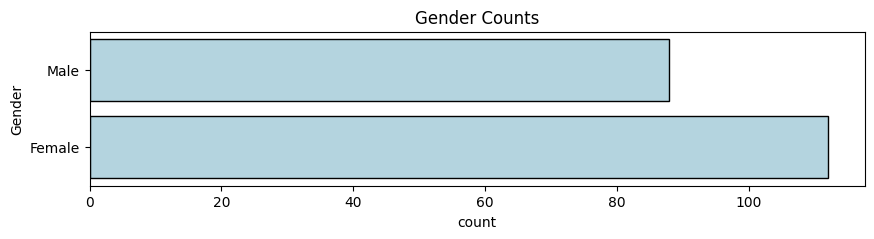

In [94]:
plt.figure(figsize = (10,2))
sns.countplot(df['Gender'] , color = 'lightblue',edgecolor = 'black')
plt.title('Gender Counts')
plt.show()

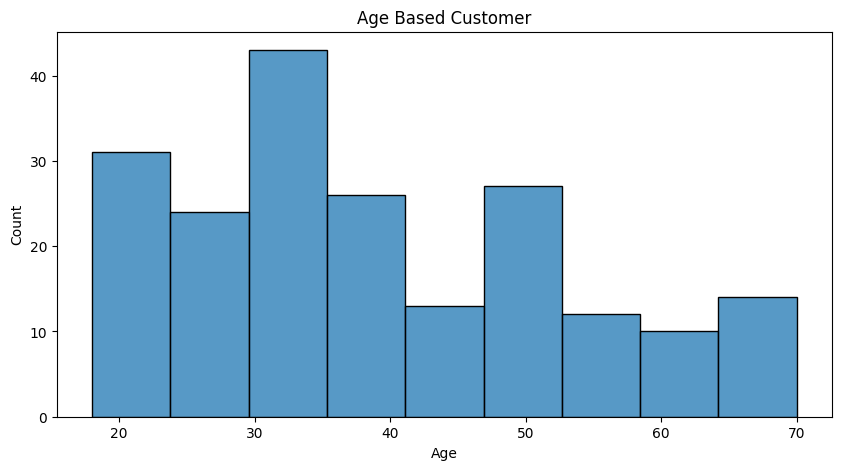

In [95]:
plt.figure(figsize = (10,5))
sns.histplot(x = df['Age'],data = df)
plt.title('Age Based Customer')
plt.show()

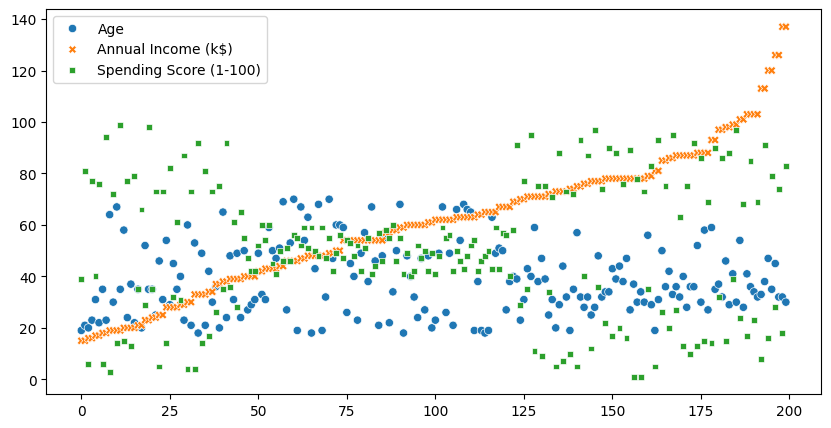

In [96]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df)
plt.show()

In [157]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = df[['Annual Income (k$)','Spending Score (1-100)']].values

# Finding cluster count

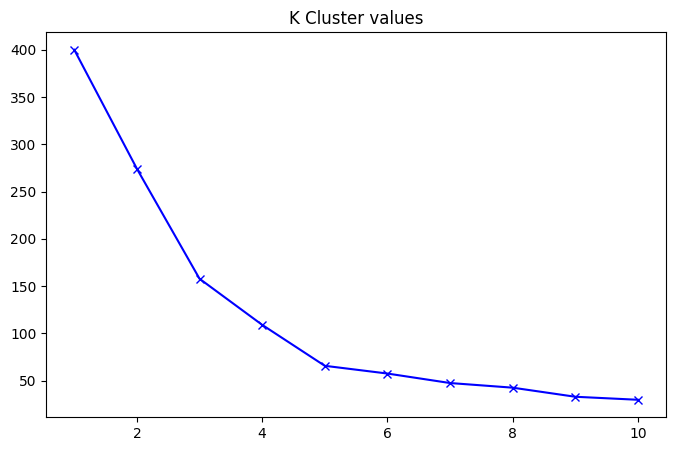

In [158]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

inertia
plt.figure(figsize = (8,5))
plt.plot(range(1,11),inertia, 'bx-')
plt.title('K Cluster values')
plt.show()


# KMeans Cluster

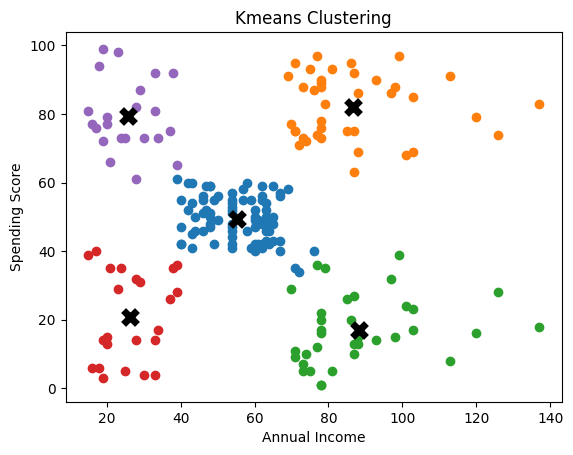

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [159]:
optimal_k = 5
kmeans = KMeans(n_clusters = optimal_k,init = 'k-means++', random_state = 0)
kmeans.fit(X)
y = kmeans.predict(X)
centroids = kmeans.cluster_centers_

for i in range(optimal_k):
    plt.scatter(X[y == i,0],X[y == i,1])
plt.scatter(centroids[:,0],centroids[:,1], color = 'black',s = 100,lw = 5, marker = 'x')
plt.title('Kmeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

centroids

# Kmeans cluster after using Dimention reduction (PCA)

Silhouette Score: 0.5546571631100179
Calinski-Harabasz Index: 248.64932001536354
Davies-Bouldin Index: 0.5722356162263352


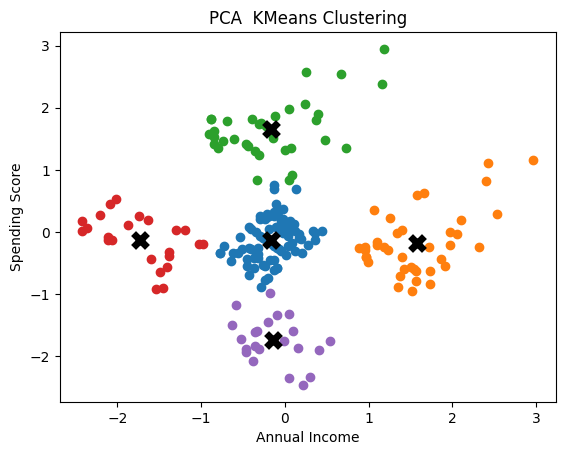

In [160]:
pca = PCA(n_components = 2)
sss
X_reduced = pca.fit_transform(X_scaled)

pca_kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++',random_state = 0)

y_pca = pca_kmeans.fit_predict(X_reduced)

centroids_pca = pca_kmeans.cluster_centers_

silhouette = silhouette_score(X_reduced, y_pca)
calinski_harabasz = calinski_harabasz_score(X_reduced, y_pca)
davies_bouldin = davies_bouldin_score(X_reduced, y_pca)

print(f'Silhouette Score: {silhouette}') #Range: -1 to 1 (higher is better)
print(f'Calinski-Harabasz Index: {calinski_harabasz}') #sum of clusters(higher is better)
print(f'Davies-Bouldin Index: {davies_bouldin}') # Mean of clusters(lower is better)

for i in range(optimal_k):
    plt.scatter(X_reduced[y_pca == i,0],X_reduced[y_pca == i,1])
plt.scatter(centroids_pca[:,0],centroids_pca[:,1], color = 'black',s = 100,lw = 5, marker = 'x') 
plt.title('PCA  KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
